### TD3 Stats descriptives 

In [1]:
import numpy as np 
import pandas as pd

In [2]:
!pip install openpyxl


In [3]:
df = pd.read_excel('./data/accars_b.xlsx')

In [4]:
df.head()

,flight_phase,engine_number,engine_type,aircraft_number,engine_position,airline_classif_environment,brat,cas,cycles,delfn,...,ztoil,zvb1f,zvb1r,zvb2f,zvb2r,zvsv,zwbp1,zwbp2,zwf36,zxm
0,CLIMB,186,10,192,1,Neutral,1.0,151.0,6.0,-0.1146,...,88.0,0.57,0.73,0.12,0.13,8.9,5.0,5.0,5335.0,0.637
1,CLIMB,186,10,192,1,Neutral,1.0,143.0,7.0,-0.2464,...,90.8,0.58,0.76,0.15,0.10,9.0,5.6,5.6,4987.0,0.624
2,CLIMB,186,10,192,1,Neutral,1.0,163.0,8.0,NaN,...,89.0,0.28,0.48,0.16,0.05,10.1,5.0,5.2,4251.0,0.530
3,CLIMB,186,10,192,1,Neutral,1.0,152.0,9.0,NaN,...,87.0,0.44,0.67,0.14,0.08,8.9,5.6,5.6,5356.0,0.380
4,CLIMB,186,10,192,1,Neutral,1.0,154.0,10.0,NaN,...,85.3,0.26,0.48,0.25,0.06,10.5,5.6,5.6,NaN,0.543


In [5]:
df.columns

Index(['flight_phase', 'engine_number', 'engine_type', 'aircraft_number',
       'engine_position', 'airline_classif_environment', 'brat', 'cas',
       'cycles', 'delfn', 'deln1', 'dtamb', 'egthdm', 'iai', 'iaie1', 'iaie2',
       'iaiwg', 'ibe1', 'ibe2', 'ivs12', 'pcn1k', 'sloatl', 'tsih', 'vbvpos',
       'wbe', 'yn1mod', 'zalt', 'zhptac', 'zlptac', 'zpcn12', 'zpcn25',
       'zphsf', 'zphsr', 'zpoil', 'zps3', 'zt1a', 'zt25', 'zt3', 'zt49',
       'ztla', 'ztoil', 'zvb1f', 'zvb1r', 'zvb2f', 'zvb2r', 'zvsv', 'zwbp1',
       'zwbp2', 'zwf36', 'zxm'],
      dtype='object')

1.2. Y a-t-il des valeurs manquantes ? Si oui, décrivez leur répartition et affichez le nombre de valeurs manquantes par colonne sous forme d'un bar plot.

In [6]:
df.isna().sum()


flight_phase                       0
engine_number                      0
engine_type                        0
aircraft_number                    0
engine_position                    0
airline_classif_environment      484
brat                               4
cas                            11920
cycles                         30553
delfn                            584
deln1                            584
dtamb                            584
egthdm                          1351
iai                                4
iaie1                            308
iaie2                            308
iaiwg                              4
ibe1                               0
ibe2                               0
ivs12                              0
pcn1k                           1351
sloatl                          1351
tsih                           32885
vbvpos                         27236
wbe                            36699
yn1mod                             4
zalt                              34
z

In [7]:
df.isnull().sum()


flight_phase                       0
engine_number                      0
engine_type                        0
aircraft_number                    0
engine_position                    0
airline_classif_environment      484
brat                               4
cas                            11920
cycles                         30553
delfn                            584
deln1                            584
dtamb                            584
egthdm                          1351
iai                                4
iaie1                            308
iaie2                            308
iaiwg                              4
ibe1                               0
ibe2                               0
ivs12                              0
pcn1k                           1351
sloatl                          1351
tsih                           32885
vbvpos                         27236
wbe                            36699
yn1mod                             4
zalt                              34
z

In [8]:
total = df.isna().sum().sum()
percent_missing = (total / df.size) * 100
print(f"Total : {total} valeurs manquantes ({percent_missing:.2f} % des données)")


Total : 475585 valeurs manquantes (20.40 % des données)


In [9]:
import matplotlib.pyplot as plt 

In [10]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values

airline_classif_environment      484
brat                               4
cas                            11920
cycles                         30553
delfn                            584
deln1                            584
dtamb                            584
egthdm                          1351
iai                                4
iaie1                            308
iaie2                            308
iaiwg                              4
pcn1k                           1351
sloatl                          1351
tsih                           32885
vbvpos                         27236
wbe                            36699
yn1mod                             4
zalt                              34
zhptac                         29817
zlptac                         29805
zpcn12                             2
zpcn25                           120
zphsf                          12060
zphsr                          13497
zpoil                           6546
zps3                           25835
z

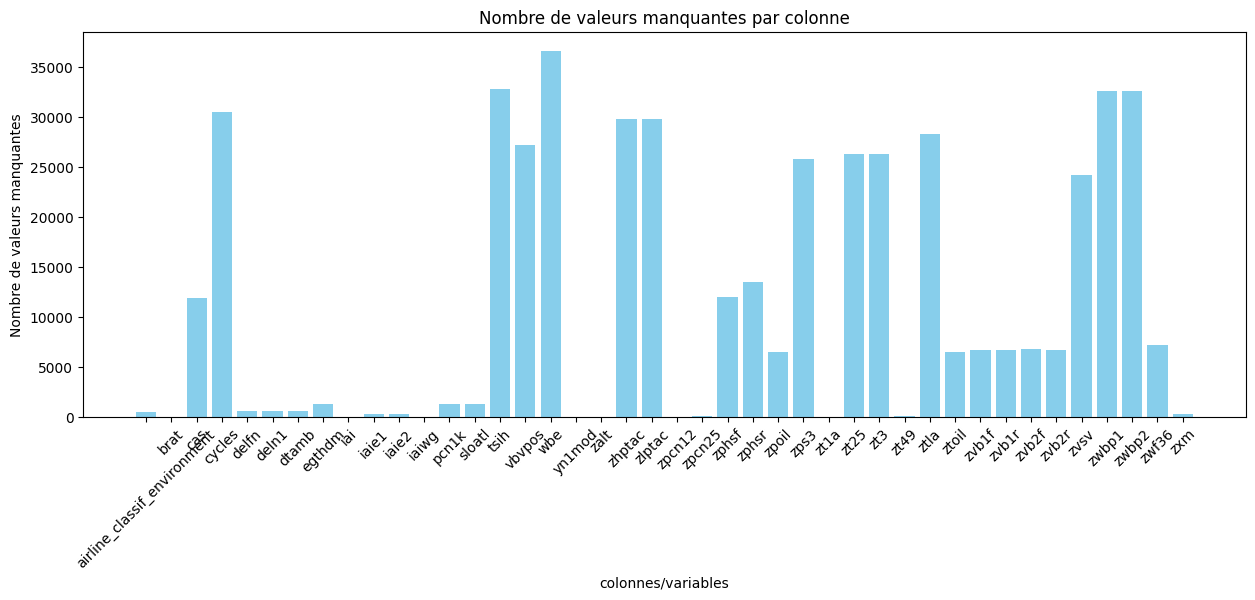

In [18]:
plt.figure(figsize=(15, 5))
plt.bar(missing_values.index, missing_values.values, color='skyblue')
plt.title("Nombre de valeurs manquantes par colonne")
plt.xlabel("colonnes/variables")
plt.ylabel("Nombre de valeurs manquantes")
plt.xticks(rotation=45)
plt.show()

1.3. Ne gardez que les lignes où le nombre de cycles (variable cycles) et la marge EGT (variable egthdm) sont présentes.

In [11]:
df_clean  = df[df['cycles'].notna()]

In [12]:
df_clean = df_clean[df_clean['egthdm'].notna()]

In [26]:
"""on pouvait faire les deux en 1 avec df['cycles','egthdm'].notna()"""

"on pouvait faire les deux en 1 avec df['cycles','egthdm'].notna()"

In [13]:
df_clean.shape

(15374, 50)

In [14]:
df.shape

(46621, 50)

1.4. Affichez les différents types de moteurs (indice : utilisez la méthode unique()).

In [15]:
print(df_clean['engine_type'].unique())

[10  5  7]


1.5. Sélectionnez uniquement les moteurs de type 10. Combien y a-t-il d'avions distincts ? Combien de vols par avion ? (attention : il y a 2 moteurs sur un avion)

In [16]:
df_clean.columns

Index(['flight_phase', 'engine_number', 'engine_type', 'aircraft_number',
       'engine_position', 'airline_classif_environment', 'brat', 'cas',
       'cycles', 'delfn', 'deln1', 'dtamb', 'egthdm', 'iai', 'iaie1', 'iaie2',
       'iaiwg', 'ibe1', 'ibe2', 'ivs12', 'pcn1k', 'sloatl', 'tsih', 'vbvpos',
       'wbe', 'yn1mod', 'zalt', 'zhptac', 'zlptac', 'zpcn12', 'zpcn25',
       'zphsf', 'zphsr', 'zpoil', 'zps3', 'zt1a', 'zt25', 'zt3', 'zt49',
       'ztla', 'ztoil', 'zvb1f', 'zvb1r', 'zvb2f', 'zvb2r', 'zvsv', 'zwbp1',
       'zwbp2', 'zwf36', 'zxm'],
      dtype='object')

In [17]:
#nombre de avions distincts
df_clean[df_clean['engine_type']==10]['aircraft_number'].nunique()

5

In [18]:
# combien de vols par avions ? 

vols_par_avion = df_clean.groupby(
    'aircraft_number'
).size().reset_index(name="nb_enregistrements")

vols_par_avion['nb_vols'] = vols_par_avion['nb_enregistrements']/2
print(vols_par_avion)
#df_clean['aircraft_number'].nunique()

     aircraft_number  nb_enregistrements  nb_vols
0                  7                 320    160.0
1                 11                  34     17.0
2                 12                 218    109.0
3                 14                 194     97.0
4                 16                  36     18.0
..               ...                 ...      ...
98               197                 124     62.0
99               198                 100     50.0
100              203                 192     96.0
101              204                 238    119.0
102              206                  36     18.0

[103 rows x 3 columns]


## 2. Étude de la marge EGT de l'avion 190

2.1. Récupérez les variables engine_number, nombre de cycles (cycles) et marge EGT (egthdm) pour l'avion identifié par le numéro 190.

In [19]:
df_190 = df_clean[df_clean['aircraft_number'] == 190][['engine_number', 'cycles', 'egthdm']]
df_190.head()


,engine_number,cycles,egthdm
11398,179,98.0,52.0118
11399,180,69.0,57.6415
11400,180,75.0,48.7217
11755,179,0.0,37.6572
11756,179,1.0,37.2208


2.2. Affichez la courbe de l'évolution de la marge EGT au cours du temps pour les deux moteurs de l'avion, sur deux graphes séparés et en prenant soin d'ajouter des légendes.

In [20]:
moteur1 = df_190[df_190['engine_number'] == df_190['engine_number'].unique()[0]]
moteur1

,engine_number,cycles,egthdm
11398,179,98.0,52.0118
11755,179,0.0,37.6572
11756,179,1.0,37.2208
11757,179,2.0,40.2041
11758,179,3.0,42.7922
...,...,...,...
45523,179,77.0,51.8369
45808,179,35.0,49.2379
46111,179,163.0,45.8711
46411,179,30.0,56.5585


In [21]:
df_190['engine_number'].nunique()

2

In [22]:
moteur1 = df_190[df_190['engine_number'] == df_190['engine_number'].unique()[0]]
moteur2 = df_190[df_190['engine_number'] == df_190['engine_number'].unique()[1]]


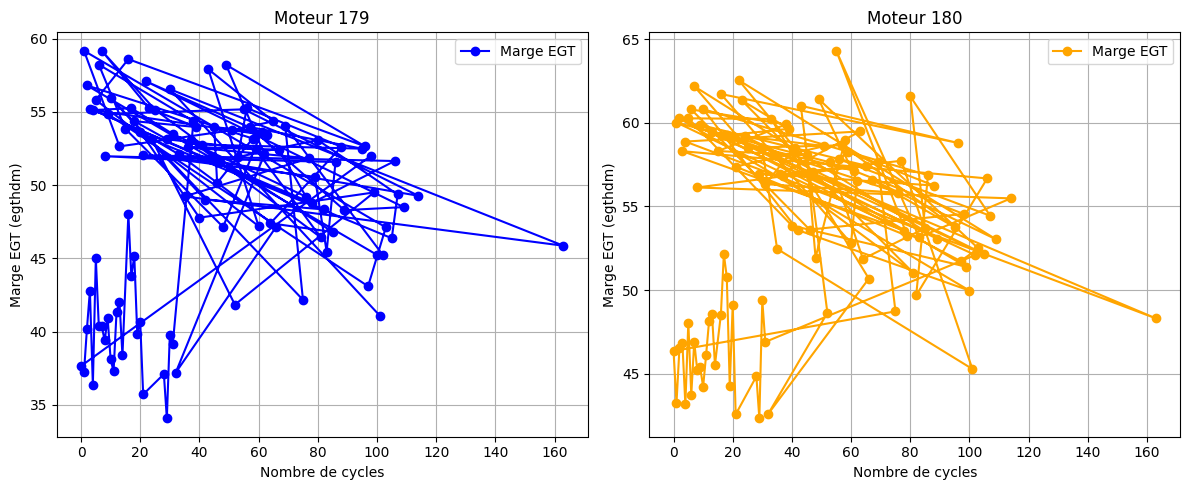

In [23]:
#creation de deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Moteur 1
axes[0].plot(moteur1['cycles'], moteur1['egthdm'], color='blue', marker='o', label='Marge EGT')
axes[0].set_title(f"Moteur {moteur1['engine_number'].unique()[0]}")
axes[0].set_xlabel("Nombre de cycles")
axes[0].set_ylabel("Marge EGT (egthdm)")
axes[0].legend()
axes[0].grid(True)

#Moteur 2-
axes[1].plot(moteur2['cycles'], moteur2['egthdm'], color='orange', marker='o', label='Marge EGT')
axes[1].set_title(f"Moteur {moteur2['engine_number'].unique()[0]}")
axes[1].set_xlabel("Nombre de cycles")
axes[1].set_ylabel("Marge EGT (egthdm)")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


2.3. Pour la suite, on ne s'intéresse qu'au moteur 179. Quel est le nombre de vols manquant dans les données ?

In [24]:
df_190_179 = df_190[df_190['engine_number']==179]
df_190_179.head()

,engine_number,cycles,egthdm
11398,179,98.0,52.0118
11755,179,0.0,37.6572
11756,179,1.0,37.2208
11757,179,2.0,40.2041
11758,179,3.0,42.7922


In [25]:
max_cycle = moteur1['cycles'].max() # nbre de cycles attendus 
n_observes = moteur1['cycles'].nunique()  #cycles distincts observés

vols_manquants = (max_cycle + 1) - n_observes

print(f"Nombre de vols manquants : {vols_manquants}")


Nombre de vols manquants : 73.0


2.4. Nettoyage de la marge EGT

On constate que sur un même cycle, il peut y avoir 2 valeurs de la variable egthdm mesurées. On ne souhaite garder que la plus grande des deux, et avoir une seule ligne par cycle, afin que l'on puisse utiliser le nombre de cycles comme index. Enfin, on veut compléter l'index pour les vols manquants, en remplissant les lignes par NaN. Pour cela, effectuez l'exercice suivant:

1/   Utilisez une aggrégation pour obtenir la plus grande valeur à chaque cycle et stockez le résultat dans une Series pandas appelée 'egt'.

In [26]:
egt = moteur1.groupby('cycles')['egthdm'].max()
egt


cycles
0.0      37.6572
1.0      59.1796
2.0      56.8104
3.0      55.2263
4.0      55.1283
          ...   
106.0    51.6519
107.0    49.3682
109.0    48.5079
114.0    49.2813
163.0    45.8711
Name: egthdm, Length: 91, dtype: float64

2/ Ré-indexez le DataFrame pour avoir une ligne pour tout nombre de cycles (indice : passez par la méthode reindex).

In [27]:

index_complet = range(int(egt.index.min()), int(egt.index.max()) + 1)

# Réindexation
egt = egt.reindex(index_complet)
print(f"Nombre de NaN (vols manquants) : {egt.isna().sum()}")


Nombre de NaN (vols manquants) : 73


In [63]:
egt

cycles
0      37.6572
1      59.1796
2      56.8104
3      55.2263
4      55.1283
        ...   
159        NaN
160        NaN
161        NaN
162        NaN
163    45.8711
Name: egthdm, Length: 164, dtype: float64

2.5. On souhaite lisser les valeurs et se débarasser des outliers à l'aide d'une médiane glissante sur 15 cycles. Affichez sur un même graphe la marge EGT brute (points) et la marge lissée (ligne).

In [28]:
egt_lisse = egt.rolling(window=15, center=True, min_periods=3).median()



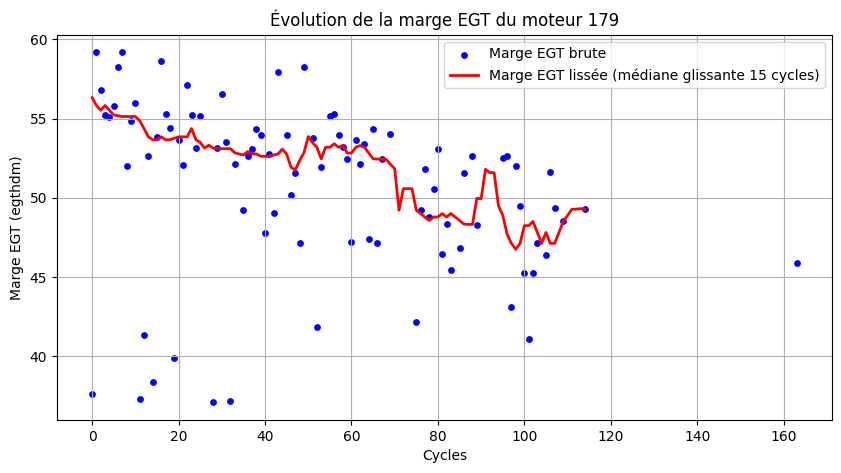

In [68]:
plt.figure(figsize=(10, 5))

# Marge brute bleue
plt.scatter(egt.index, egt, color='blue', s=15, label='Marge EGT brute')

# Marge lissée ligne rouge
plt.plot(egt_lisse.index, egt_lisse, color='red', linewidth=2, label='Marge EGT lissée (médiane glissante 15 cycles)')

#Légendes et titres
plt.title("Évolution de la marge EGT du moteur 179")
plt.xlabel("Cycles")
plt.ylabel("Marge EGT (egthdm)")
plt.legend()
plt.grid(True)
plt.show()


2.6. Nettoyage de la marge EGT lissée

La marge EGT ne peut être que décroissante, sauf en cas de nettoyage moteur (waterwash) ou peut-être à cause d'éléments extérieurs, on va donc éviter de tenir compte des remontées de marge et ne prendre en considération que les points descendants. Cette estimation est pessimiste mais évite de prendre en compte ces facteurs extérieurs.

1/    Calculez une série ne contenant que les valeurs décroissantes de la amrge EGT lissée.

In [29]:
egt_decr = egt_lisse.cummin()

In [72]:
"""2/ Sur le graphique précédent, ajoutez ces points par-dessus la courbe."""

'2/ Sur le graphique précédent, ajoutez ces points par-dessus la courbe.'

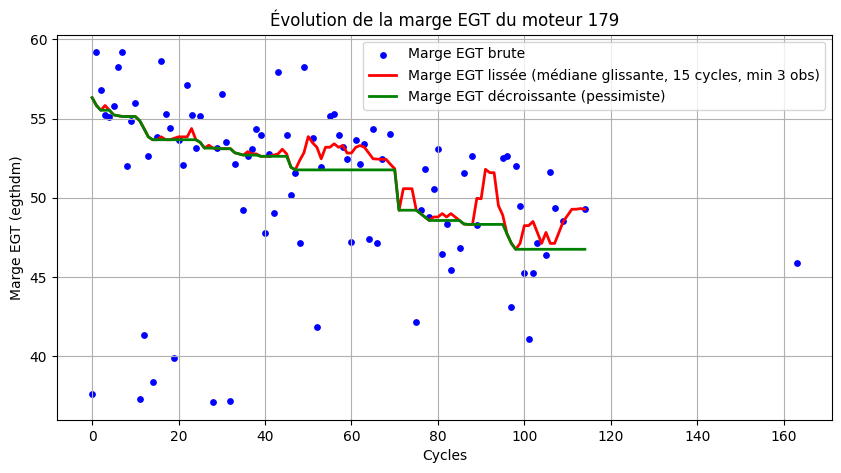

In [30]:
plt.figure(figsize=(10, 5))

# Marge brute (points)
plt.scatter(egt.index, egt, color='blue', s=15, label='Marge EGT brute')

# Marge lissée (ligne rouge)
plt.plot(egt_lisse.index, egt_lisse, color='red', linewidth=2,
         label='Marge EGT lissée (médiane glissante, 15 cycles, min 3 obs)')

# Marge décroissante (ligne verte)
plt.plot(egt_decr.index, egt_decr, color='green', linewidth=2,
         label='Marge EGT décroissante (pessimiste)')

# Titres et axes
plt.title("Évolution de la marge EGT du moteur 179")
plt.xlabel("Cycles")
plt.ylabel("Marge EGT (egthdm)")
plt.legend()
plt.grid(True)
plt.show()


2.7. Estimation de la pente de la marge EGT

La pente de la marge EGT est un indicateur très intéressant de l'usure du moteur. On l'estime par régression linéaire par rapport au nombre de cycles. Pour cela, on utilise les points conservés précédemment qui constituent une estimation pessimiste.

Pour la régression linéaire, on utilisera le modèle LinearRegression de scikit-learn. Son utilisation est similaire aux autres modèles de scikit-learn :

lr = LinearRegression()
model = lr.fit(X, y)

1/    Apprenez un modèle LinearRegression sur les données calculées précédemment. Affichez les coefficients et l'ordonnée à l'origine (intercept) du modèle obtenu. Les valeurs sont-elles cohérentes ? (indices : pour passer d'un objet pandas (DataFrame ou Series) à un array numpy, utilisez la propriété values)

In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np

# On retire les valeurs NaN
mask = ~egt_decr.isna()
X = egt_decr.index[mask].values.reshape(-1, 1)  # cycles
y = egt_decr[mask].values                      # marge EGT : variable cible


In [32]:
lr = LinearRegression()
lr.fit(X, y)

# Coefficients
pente = lr.coef_[0]
intercept = lr.intercept_

print(f"Pente estimée : {pente:.4f}")
print(f"Ordonnée à l'origine : {intercept:.4f}")


Pente estimée : -0.0820
Ordonnée à l'origine : 55.7425


2/   Tracez la droite obtenue sur le graphe précédent.



In [33]:
y_pred = lr.predict(X)


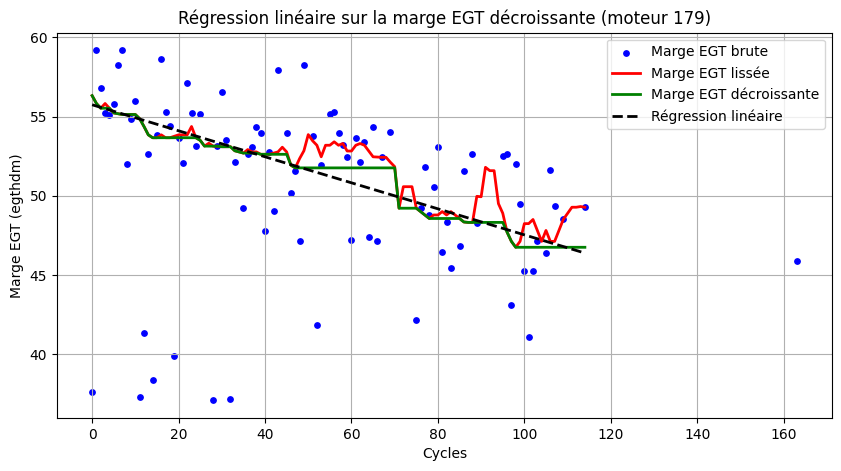

In [34]:
plt.figure(figsize=(10, 5))

# Points 
plt.scatter(egt.index, egt, color='blue', s=15, label='Marge EGT brute')

# Courbe lissée
plt.plot(egt_lisse.index, egt_lisse, color='red', linewidth=2, label='Marge EGT lissée')

# Courbe décroissante
plt.plot(egt_decr.index, egt_decr, color='green', linewidth=2, label='Marge EGT décroissante')

# Droite de régression
plt.plot(X, y_pred, color='black', linestyle='--', linewidth=2, label='Régression linéaire')

plt.title("Régression linéaire sur la marge EGT décroissante (moteur 179)")
plt.xlabel("Cycles")
plt.ylabel("Marge EGT (egthdm)")
plt.legend()
plt.grid(True)
plt.show()


"""
3. Écriture d'une fonction de calcul de la pente EGT pour tous les moteurs

Tout d'abord, bravo si vous êtes arrivés jusque là ! Toutes les opérations que l'on a effectuées ont permis d'estimer la pente de la marge EGT du moteur 179 de l'avion 190 de type 10, et donc son usure. Maintenant, on souhaite répéter ce processus sur tous les moteurs ! Pour cela, il faudra créer une fonction Python générique, prenant en entrée l'ensemble du jeu de données ACARS et produisant en sortie l'ensemble des pentes/intercept des modèles de régression linéaire appris pour chaque moteur.

L'un des intérêts est de pouvoir prédire l'usure des moteurs, après un nombre de cycles donné.

Voici le squelette de la fonction à écrire (en ré-utilisant et adaptant tout les morceaux de code précédents) :

def regress_egt_margin(df_acars):
    ...
    return df_regress_models # Contient les pentes et intercept pour tous les moteurs

"""

In [37]:
def regress_egt_margin(df_acars):
    """
    Calcule la pente (usure) et l'intercept de la marge EGT
    pour chaque moteur présent dans le jeu de données ACARS.
    
    Paramètres
    df_acars : DataFrame
        Jeu de données complet contenant au minimum les colonnes :
        ['aircraft_number', 'engine_number', 'cycles', 'egthdm']
    
    Retour
    df_regress_models : DataFrame
        Résumé contenant pour chaque moteur :
        - aircraft_number
        - engine_number
        - pente (usure moyenne)
        - intercept (marge initiale estimée)
        - nombre de cycles pris en compte
    """

    #résultats
    results = []

    #pour chaque moteur unique
    for (aircraft, engine), data in df_acars.groupby(['aircraft_number', 'engine_number']):
        #retirer les NaN
        data = data.dropna(subset=['cycles', 'egthdm'])

        if len(data) < 10:  # ignorer les moteurs avec peu de points
            continue

        #on garde la plus grande valeur d'EGT par cycle
        egt = data.groupby('cycles')['egthdm'].max()

        #On réindexe pour combler les cycles manquants
        index_complet = range(int(egt.index.min()), int(egt.index.max()) + 1)
        egt = egt.reindex(index_complet)

        #On lisse la série (médiane glissante sur 15 cycles)
        egt_lisse = egt.rolling(window=15, center=True, min_periods=3).median()

        #On crée une version décroissante pessimiste
        egt_decr = egt_lisse.cummin()

        #On prépare les données pour la régression
        mask = ~egt_decr.isna()
        X = np.array(egt_decr.index[mask]).reshape(-1, 1)
        y = egt_decr[mask].values

        if len(X) < 2:
            continue

        #Régression linéaire
        lr = LinearRegression()
        lr.fit(X, y)

        pente = lr.coef_[0]
        intercept = lr.intercept_

        #Stockage du résultat
        results.append({
            'aircraft_number': aircraft,
            'engine_number': engine,
            'pente': pente,
            'intercept': intercept,
            'nb_points': len(X)
        })

    df_regress_models = pd.DataFrame(results)
    return df_regress_models



4. Comparaison de l'usure des 3 types de moteurs
4.1. Prédiction de la marge EGT au 150ème par type de moteur

  1/  Pour chaque moteur, utilisez son modèle de régression pour prédire la valeur de la marge EGT après 150 cycles d'utilisation (indice : méthode apply).
  2/  Représentez ces valeurs par type moteur sur un box plot. Décrivez le résultat obtenu.
  3/  Calculez la moyenne de la marge au 150ème cycle par type de moteur. Quel type de moteur a la plus grande marge moyenne après 150 cycles ?



In [39]:
df_regress_models = regress_egt_margin(df_clean)
df_regress_models.head()

,aircraft_number,engine_number,pente,intercept,nb_points
0,7,88,-0.044252,44.089521,160
1,7,89,-0.007968,39.297590,160
2,11,183,-0.018408,55.147886,17
3,11,185,-0.007247,60.012453,17
4,12,114,-0.048570,115.296605,184


In [40]:
# Récupération du type moteur par moteur
types_moteurs = df_clean[['aircraft_number', 'engine_number', 'engine_type']].drop_duplicates()

# Fusion avec les résultats de régression
df_regress_models = df_regress_models.merge(types_moteurs, on=['aircraft_number', 'engine_number'], how='left')


In [41]:
#prédiction de la marge EGT au 150e cycle
df_regress_models['egt_150'] = df_regress_models.apply(
    lambda row: row['pente'] * 150 + row['intercept'], axis=1
)


<Figure size 800x600 with 0 Axes>

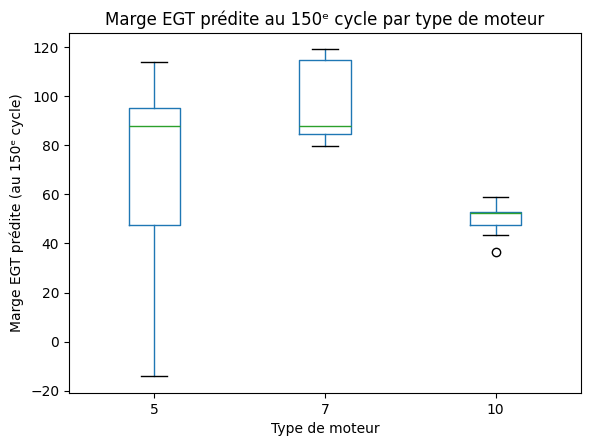

In [ ]:
#2 

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df_regress_models.boxplot(column='egt_150', by='engine_type', grid=False)
plt.title("Marge EGT prédite au 150ᵉ cycle par type de moteur")
plt.suptitle("")
plt.xlabel("Type de moteur")
plt.ylabel("Marge EGT prédite (au 150ᵉ cycle)")
plt.show()


In [43]:
moyennes_150 = df_regress_models.groupby('engine_type')['egt_150'].mean()
print(moyennes_150)

engine_type
5     75.278962
7     96.518856
10    49.828021
Name: egt_150, dtype: float64


In [44]:
best_type = moyennes_150.idxmax()
best_value = moyennes_150.max()
print(f"Le type de moteur {best_type} a la plus grande marge moyenne ({best_value:.2f}) après 150 cycles.")


Le type de moteur 7 a la plus grande marge moyenne (96.52) après 150 cycles.



4.3. Vitesse de décroissance de la marge EGT par type de moteur

La pente de la marge EGT correspond à sa vitesse de décroissance par cycle.

1/    Quelle est son unité ?
 2/   Représentez ces valeurs par type de moteur sur un boxplot. Décrivez le résultat obtenu.
 3/   Calculez moyenne de la pente par type de moteur. Quel type de moteur a la plus faible vitesse de décroissance et donc la plus faible vitesse d'usure ?



In [52]:
"""pente=ΔEGT ​/ Δcycles donc l'unité c'est l'unité de egthdm par cycle soit (°C/cycle)"""

"pente=ΔEGT \u200b/ Δcycles donc l'unité c'est l'unité de egthdm par cycle soit (°C/cycle)"

<Figure size 800x600 with 0 Axes>

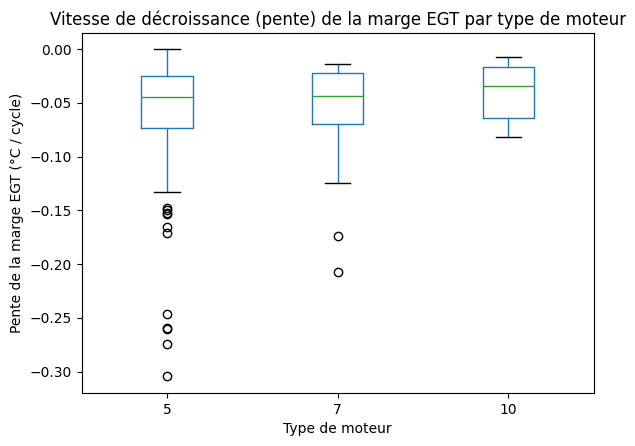

In [46]:
plt.figure(figsize=(8, 6))
df_regress_models.boxplot(column='pente', by='engine_type', grid=False)
plt.title("Vitesse de décroissance (pente) de la marge EGT par type de moteur")
plt.suptitle("")
plt.xlabel("Type de moteur")
plt.ylabel("Pente de la marge EGT (°C / cycle)")
plt.show()

In [47]:
moyennes_pente = df_regress_models.groupby('engine_type')['pente'].mean()
print(moyennes_pente)

engine_type
5    -0.058376
7    -0.063060
10   -0.040428
Name: pente, dtype: float64


In [48]:
best_type = moyennes_pente.idxmax() 
best_value = moyennes_pente.max()
print(f" Le type de moteur {best_type} a la plus faible vitesse de décroissance ({best_value:.4f} °C/cycle).")


 Le type de moteur 10 a la plus faible vitesse de décroissance (-0.0404 °C/cycle).


In [50]:
df_clean['egthdm'].describe()

count    15374.000000
mean        84.268828
std         25.262196
min        -58.191900
25%         61.919800
50%         92.224800
75%        100.382750
max        145.957000
Name: egthdm, dtype: float64